# Data collection and  preprocessing

## Importing the libraries

In [60]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [18]:
batch_size=32
image_size=256

In [19]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'E:\\DL\\Potatoe Project\\Potatoes',
    shuffle=True,
    image_size = (image_size,image_size),
    batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [20]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [21]:
for image_batch,image_label in dataset.take(1):
    print(image_batch.shape)
    print(image_label)

(32, 256, 256, 3)
tf.Tensor([1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 2 1 1 1 0 0 0 2 1 0 0 2 0 1], shape=(32,), dtype=int32)


In [22]:
training = dataset.take(54)
test_validation = dataset.skip(54)
validation = test_validation.take(6)
test = test_validation.take(8)

## splitting the data into train, test and validation sets

Training set

In [23]:
train=dataset.take(54)

In [24]:
test_validation = dataset.skip(54)

Validation set

In [25]:
validation = test_validation.take(6)

Testing set

In [26]:
test = test_validation.skip(6)

## Optimizing dataset for training performance

In [27]:
train_dataset = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Rescaling the dataset

In [28]:
resizing_and_scaling = keras.Sequential([
    keras.layers.Resizing(image_size,image_size),
    keras.layers.Rescaling(1./255)
])

## Data augmentation

In [29]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horozontal_and_vertical'),
    keras.layers.RandomRotation(0.2)
])

# Building a CNN model

## defining the model architecture

In [52]:
number_of_classes = 3

model = keras.models.Sequential([
    resizing_and_scaling,
    data_augmentation,

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = (image_size,image_size)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=.2),

    keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=.2),

    keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='sigmoid'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.2),

    keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='sigmoid'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Dropout(rate=.5),

    keras.layers.Conv2D(filters=512,kernel_size=(2,2),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=.5),    

    keras.layers.Flatten(),
    keras.layers.Dense(units=512,activation='sigmoid'),
    keras.layers.Dropout(rate=.2),
    keras.layers.Dense(units=1024,activation='sigmoid'),
    keras.layers.Dropout(rate=.5),
    keras.layers.Dense(units=1024,activation='sigmoid'),
    keras.layers.Dropout(rate=.5),
    keras.layers.Dense(units=number_of_classes,activation='softmax')
])

## Compiling the model

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fitting the model

In [54]:
history = model.fit(train_dataset,epochs=30,verbose=1,validation_data=validation_dataset,batch_size=batch_size)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.6371 - loss: 1.0277 - val_accuracy: 0.8438 - val_loss: 0.8330
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.8799 - loss: 0.3263 - val_accuracy: 0.4688 - val_loss: 2.1733
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9329 - loss: 0.2015 - val_accuracy: 0.4688 - val_loss: 3.6635
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9492 - loss: 0.1434 - val_accuracy: 0.4688 - val_loss: 4.2325
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.9521 - loss: 0.1370 - val_accuracy: 0.4688 - val_loss: 3.0510
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9633 - loss: 0.0932 - val_accuracy: 0.4688 - val_loss: 4.7151
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9748 - loss: 0.0660 - val_accuracy: 0.4688 - val_loss: 4.8217
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9729 - loss: 0.0714 - val_accuracy: 0.5000 - v

In [57]:
model.evaluate(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 515ms/step - accuracy: 0.9690 - loss: 0.1150


[0.08616923540830612, 0.9784482717514038]

Checking some training progress

In [44]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [70]:
#history.history['val_accuracy']
import pandas as pd
accuracy_dataset = pd.DataFrame({
    'accuracy':history.history['accuracy'],
    'val_accuracy':history.history['val_accuracy']
})
loss_dataset = pd.DataFrame({
    'loss': history.history['loss'],
    'val_loss' : history.history['val_loss']
})

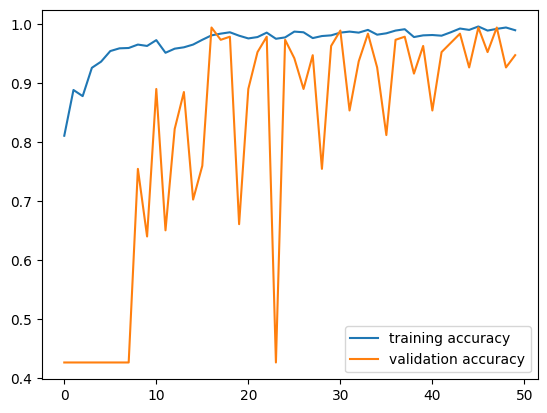

In [67]:

plt.plot(accuracy_dataset['accuracy'],label='training accuracy')
plt.plot(accuracy_dataset['val_accuracy'],label='validation accuracy')
plt.legend(loc='lower right')

## Making predictions

In [58]:
for image_batch,label in test_dataset.take(1):
    print(image_batch.shape)
    print(label)

(8, 256, 256, 3)
tf.Tensor([1 1 1 0 0 1 1 1], shape=(8,), dtype=int32)


first image to predict
Actual label:    Potato___Early_blight
Predicted label: Potato___Early_blight


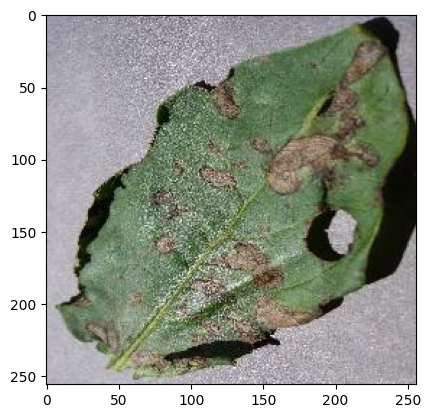

In [70]:
for batch_images, batch_labels in test_dataset.take(1):
    first_image = batch_images[0].numpy().astype('uint8')
    first_label = batch_labels[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print(f"Actual label:    {class_names[first_label]}")

    batch_predictions = model.predict(batch_images,verbose=0)
    print(f'Predicted label: {class_names[np.argmax(batch_predictions[0])]}')

## Exporting the model

In [77]:
model.save("../models/version1.h5")